# Datos meteorológicos en Mar Chiquita

El objetivo de este notebook es procesar los datos que me dio Marisa Gasssman del grupo del DCAO. 

Un posible fin de los datos es usarlor para alimentar el modelo mSCOPE con datos meteorológicos para hacer una serie temporal de Evapotranspiración.
Las variables meteorológicos que hay que tener son:

<img src="input-datos_Meteo-mScope.png">


Los datos fueron tomados en una torre de flujo en el sitio en 37.55ºS 57.30ºW en una campaña del 14 de Febrero de 2014 al 9 de Marzo de 2015.

Hay dos archivos de excel con datos:

- Datos convencionales Marchi.xlsx

- Eddy Covariance_flujos.xlsx

Para saber a qué corresponde cada medición usé el archivo METADATOS Marchi.docx
Ese archivo corresponde al segundo sitio de Mar Chiquita, pero sirve porque tiene descripción de las variables que se miden con cada sensor y la notación


In [1]:
#!pip install openpyxl

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xlrd
import datetime
import openpyxl
sns.set()

In [5]:
data = pd.read_excel('Datos Marchi-Romano para Vero.xlsx')

In [7]:
data.columns

Index(['Año', 'dia Juliano', 'hora', 'uson (m/s)', 'Ts (m/s)', 'p (hPa)',
       'dir anem (°)', 'e (hPa)', 'es(Ts) (hPa)', 'Dp = es - e (Pa)',
       'ro (kg/m3)', 'u* (m/s)', '1/L (m-1)', 'Rn (W/m2)', 'QE (W/m2)',
       'QH (W/m2)', 'QG (W/m2)', 'lv(Ts) J/kg', 'ra (s/m)', 'gama (Pa/K)',
       's (Pa/K)', 'Tita (Vol/Vol)'],
      dtype='object')

## Levanto los dos archivos para ver qué tienen

In [3]:
data = pd.read_excel('Datos convencionales Marchi.xlsx', na_values=[99.99, 99.999], parse_dates=["Fecha"],engine='openpyxl')

In [4]:
eddy = pd.read_excel('Eddy Covariance_flujos.xlsx', na_values=[99.99, 99.999],engine='openpyxl')

In [5]:
data.describe()

,Dia juliano,Hora local,Momento juliano
count,44754.000000,44946.000000,44944.000000
mean,166.197055,1172.459952,166.407777
std,99.534872,692.298654,99.420046
min,1.000000,0.000000,1.000000
25%,85.000000,600.000000,86.197917
50%,145.000000,1145.000000,144.729167
75%,249.000000,1745.000000,248.950521
max,365.000000,2345.000000,365.979167


In [6]:
eddy.describe()

,u[m/s],Ts[degC],a[g/m3],p_ref[hPa],Var[u],Var[Ts],Var[a],dir[deg],ustar[m/s],HTs[W/m2],LvE[W/m2],z/L,z/L-virt,Flag(ustar),Flag(HTs),Flag(LvE),r_err_ustar[%],r_err_HTs[%],r_err_LvE[%]
count,19821.000000,19821.000000,18138.000000,21586.000000,19817.000000,19818.000000,18077.000000,19817.000000,19817.000000,19545.000000,17962.000000,19821.000000,19821.000000,21586.000000,21586.000000,21586.000000,19817.000000,19544.000000,17955.000000
mean,3.249831,12.098064,11.255601,1016.374818,1.310141,0.684010,4.040073,169.783275,0.375303,156.443368,60.561381,0.179228,0.125865,1.947327,3.044798,3.413555,5.812702,14.701252,37.707461
std,1.819563,5.465936,6.002284,6.710941,3.203405,7.212262,46.656472,102.613219,0.380931,1453.121724,274.159416,6.996746,5.214012,2.329307,2.511255,3.143301,6.200036,31.567662,124.554014
min,-1.795825,-2.087947,0.000022,994.636536,0.000248,0.000000,0.000001,0.038366,0.005647,-6177.690918,-6376.163086,-156.030951,-158.243995,1.000000,1.000000,1.000000,1.126291,2.792074,3.684651
25%,1.745301,8.577650,8.306431,1012.095047,0.244811,0.023331,0.008497,78.896141,0.179279,-24.537655,0.366353,-0.017883,-0.018302,1.000000,1.000000,1.000000,4.047017,7.887711,10.345447
50%,2.981231,11.586856,10.776640,1015.492554,0.729988,0.060229,0.034190,156.171433,0.326222,-5.051814,22.295033,0.006738,0.006405,1.000000,3.000000,1.000000,4.654762,9.141486,13.951037
75%,4.485382,15.526720,13.776026,1020.975571,1.569256,0.172449,0.129429,266.931427,0.495872,64.274086,90.679842,0.053899,0.052012,1.000000,4.000000,6.000000,5.664880,11.634580,32.502727
max,11.580680,43.202286,89.699722,1037.350342,119.800499,308.545013,1642.803101,359.985901,6.521709,52067.894530,12031.174800,665.379687,665.379687,9.000000,9.000000,9.000000,339.890167,1642.349854,8350.856445


## Procesamiento del archivo Datos meteorológicos


In [7]:
data.head(10)

,Fecha,Dia juliano,Hora local,Momento juliano,TSS1,TSS1.1,TSS2,TSS2.1,TS_QG,TS_QG.1,...,HS3,HS3.1,TSH4,TSH4.1,HS4,HS4.1,TSH5,TSH5.1,HS5,HS5.1
0,NaT,NaN,NaN,NaN,°C,°C,°C,°C,°C,°C,...,%,%,°C,°C,%,%,°C,°C,%,%
1,NaT,NaN,NaN,NaN,Promedio,Desv. Est.,Promedio,Desv. Est.,Promedio,Desv. Est.,...,Promedio,Desv. Est.,Promedio,Desv. Est.,Promedio,Desv. Est.,Promedio,Desv. Est.,Promedio,Desv. Est.
2,2018-02-23,54.0,845.0,54.364583,18.15,0.017,17.97,0.058,18.47,0.014,...,0.435,0.011,19.67,0.068,0.292,0.071,19.1,0,1.002,0.057
3,2018-02-23,54.0,900.0,54.375000,18.16,0.015,18.12,0.049,18.46,0.013,...,0.436,0.011,19.67,0.075,0.277,0.064,19.1,0,1.006,0.058
4,2018-02-23,54.0,915.0,54.385417,18.18,0.018,18.26,0.043,18.46,0.014,...,0.437,0.011,19.63,0.094,0.308,0.071,19.1,0,0.974,0.04
5,2018-02-23,54.0,930.0,54.395833,18.25,0.026,18.35,0.026,18.46,0.014,...,0.439,0.011,19.57,0.096,0.294,0.068,19.1,0,1.014,0.059
6,2018-02-23,54.0,945.0,54.406250,18.35,0.042,18.53,0.066,18.47,0.017,...,0.436,0.011,19.53,0.075,0.311,0.069,19.1,0,1.018,0.06
7,2018-02-23,54.0,1000.0,54.416667,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2018-02-23,54.0,1015.0,54.427083,19,0.085,19.02,0.09,18.63,0.019,...,NaN,NaN,19.5,0,0.344,0.059,19.1,0,0.982,0.049
9,2018-02-23,54.0,1030.0,54.437500,19.26,0.063,19.16,0.036,18.72,0.031,...,NaN,NaN,19.5,0,0.35,0.057,19.1,0,1.022,0.059


In [8]:
data = data.drop([0,1],axis=0) # elimino las dos primeras filas que son unidades y descripción de la medición
data = data.reset_index(drop=True)
data.head(10)

,Fecha,Dia juliano,Hora local,Momento juliano,TSS1,TSS1.1,TSS2,TSS2.1,TS_QG,TS_QG.1,...,HS3,HS3.1,TSH4,TSH4.1,HS4,HS4.1,TSH5,TSH5.1,HS5,HS5.1
0,2018-02-23,54.0,845.0,54.364583,18.15,0.017,17.97,0.058,18.47,0.014,...,0.435,0.011,19.67,0.068,0.292,0.071,19.1,0,1.002,0.057
1,2018-02-23,54.0,900.0,54.375000,18.16,0.015,18.12,0.049,18.46,0.013,...,0.436,0.011,19.67,0.075,0.277,0.064,19.1,0,1.006,0.058
2,2018-02-23,54.0,915.0,54.385417,18.18,0.018,18.26,0.043,18.46,0.014,...,0.437,0.011,19.63,0.094,0.308,0.071,19.1,0,0.974,0.04
3,2018-02-23,54.0,930.0,54.395833,18.25,0.026,18.35,0.026,18.46,0.014,...,0.439,0.011,19.57,0.096,0.294,0.068,19.1,0,1.014,0.059
4,2018-02-23,54.0,945.0,54.406250,18.35,0.042,18.53,0.066,18.47,0.017,...,0.436,0.011,19.53,0.075,0.311,0.069,19.1,0,1.018,0.06
5,2018-02-23,54.0,1000.0,54.416667,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2018-02-23,54.0,1015.0,54.427083,19,0.085,19.02,0.09,18.63,0.019,...,NaN,NaN,19.5,0,0.344,0.059,19.1,0,0.982,0.049
7,2018-02-23,54.0,1030.0,54.437500,19.26,0.063,19.16,0.036,18.72,0.031,...,NaN,NaN,19.5,0,0.35,0.057,19.1,0,1.022,0.059
8,2018-02-23,54.0,1045.0,54.447917,19.44,0.051,19.36,0.044,18.78,0.044,...,NaN,NaN,19.5,0,0.342,0.051,19.1,0,1.015,0.058
9,2018-02-23,54.0,1100.0,54.458333,19.69,0.071,19.51,0.103,18.89,0.029,...,NaN,NaN,19.5,0,0.349,0.043,19.1,0,1.023,0.058


In [9]:
data['fecha'] = pd.to_datetime({'year':pd.DatetimeIndex(data['Fecha']).year, 'month': pd.DatetimeIndex(data['Fecha']).month, 'day': pd.DatetimeIndex(data['Fecha']).day})


In [10]:
data.head(10)

,Fecha,Dia juliano,Hora local,Momento juliano,TSS1,TSS1.1,TSS2,TSS2.1,TS_QG,TS_QG.1,...,HS3.1,TSH4,TSH4.1,HS4,HS4.1,TSH5,TSH5.1,HS5,HS5.1,fecha
0,2018-02-23,54.0,845.0,54.364583,18.15,0.017,17.97,0.058,18.47,0.014,...,0.011,19.67,0.068,0.292,0.071,19.1,0,1.002,0.057,2018-02-23
1,2018-02-23,54.0,900.0,54.375000,18.16,0.015,18.12,0.049,18.46,0.013,...,0.011,19.67,0.075,0.277,0.064,19.1,0,1.006,0.058,2018-02-23
2,2018-02-23,54.0,915.0,54.385417,18.18,0.018,18.26,0.043,18.46,0.014,...,0.011,19.63,0.094,0.308,0.071,19.1,0,0.974,0.04,2018-02-23
3,2018-02-23,54.0,930.0,54.395833,18.25,0.026,18.35,0.026,18.46,0.014,...,0.011,19.57,0.096,0.294,0.068,19.1,0,1.014,0.059,2018-02-23
4,2018-02-23,54.0,945.0,54.406250,18.35,0.042,18.53,0.066,18.47,0.017,...,0.011,19.53,0.075,0.311,0.069,19.1,0,1.018,0.06,2018-02-23
5,2018-02-23,54.0,1000.0,54.416667,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-02-23
6,2018-02-23,54.0,1015.0,54.427083,19,0.085,19.02,0.09,18.63,0.019,...,NaN,19.5,0,0.344,0.059,19.1,0,0.982,0.049,2018-02-23
7,2018-02-23,54.0,1030.0,54.437500,19.26,0.063,19.16,0.036,18.72,0.031,...,NaN,19.5,0,0.35,0.057,19.1,0,1.022,0.059,2018-02-23
8,2018-02-23,54.0,1045.0,54.447917,19.44,0.051,19.36,0.044,18.78,0.044,...,NaN,19.5,0,0.342,0.051,19.1,0,1.015,0.058,2018-02-23
9,2018-02-23,54.0,1100.0,54.458333,19.69,0.071,19.51,0.103,18.89,0.029,...,NaN,19.5,0,0.349,0.043,19.1,0,1.023,0.058,2018-02-23


In [11]:
print(data.isnull().sum())

Fecha                  0
Dia juliano          192
Hora local             0
Momento juliano        2
TSS1                1985
TSS1.1              1985
TSS2                1985
TSS2.1              1985
TS_QG               1985
TS_QG.1             1985
U                   1985
U.1                17436
DIR                    7
DIR.1               1985
PP                  1985
TA1                 1985
TA1.1               1985
HR1                 1989
HR1.1               1985
TA2                 1985
TA2.1               1985
TA3                 1985
TA3.1               1985
HR3                 1986
HR3.1               1986
TA4                 1985
TA4.1               1985
HR4                 1985
HR4.1               1985
QG1                 1974
QG1.1               1974
QG2                 1974
QG2.1               1974
WET                 1985
WET.1               1985
RG                  1977
RG.1                1979
PAR                 2068
PAR.1               2074
TSH1                2020


In [12]:
data2 = data.copy()

In [13]:
columnas_sel = ['fecha','Hora local','Dia juliano','U','TA1','HR1','TA3','HR3','TA4','HR4','RG']

In [14]:
data3 = data2[columnas_sel]

In [15]:
data3.shape

(44946, 11)

Quiero poder meter la Hora dentro de la fecha, pero primero necesito extraer la hora y minutos partiendo la columna hora local

In [16]:
data3['Hora local'] = data3['Hora local'].astype(int)

<ipython-input-16-dbce2439bee5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['Hora local'] = data3['Hora local'].astype(int)


In [17]:
#print(data3['Hora local'])

In [18]:
data3['Hora local'] = data3['Hora local'].astype(str)

<ipython-input-18-83b2e0973d62>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['Hora local'] = data3['Hora local'].astype(str)


## Hay instancias con la hora con 3 dígitos y otros con 4. Agrego un 0 adelante en las de 3 dígitos para poder partir a la mitad Hora local en Hora y Minutos

In [19]:
for i in range(0,data3.shape[0]):
    if len(data3.loc[i,'Hora local']) < 4:
        data3.loc[i,'Hora local2'] = '0'+data3.loc[i,'Hora local']
    else:
        data3.loc[i,'Hora local2'] = data3.loc[i,'Hora local']    

/home/usuariousuario/anaconda3/envs/INE/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/usuariousuario/anaconda3/envs/INE/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [20]:
data3

,fecha,Hora local,Dia juliano,U,TA1,HR1,TA3,HR3,TA4,HR4,RG,Hora local2
0,2018-02-23,845,54.0,4.701,19,60.46,19.35,61.28,19.14,60.54,469.4,0845
1,2018-02-23,900,54.0,5.088,19.18,59.93,19.64,60.31,19.32,59.98,525.4,0900
2,2018-02-23,915,54.0,5.18,19.4,58.66,19.92,58.9,19.53,58.76,585.1,0915
3,2018-02-23,930,54.0,5.217,19.47,57.12,20.07,57.17,19.62,57.23,640.6,0930
4,2018-02-23,945,54.0,5.059,19.56,57.82,20.26,57.41,19.73,57.89,705.7,0945
...,...,...,...,...,...,...,...,...,...,...,...,...
44941,2019-06-06,1200,157.0,2.184,14.42,91.7,13.95,88.9,13.95,90.3,64.42,1200
44942,2019-06-06,1215,157.0,2.618,14.56,91.4,14.11,88.5,14.1,89.9,62.25,1215
44943,2019-06-06,1230,157.0,2.648,14.72,91.3,14.29,88.4,14.25,89.7,79.18,1230
44944,2019-06-06,1245,157.0,2.805,14.86,91,14.48,87.8,14.41,89.3,76.34,1245


In [21]:
data3 = data3.drop(['Hora local'],axis=1)

In [22]:
data3['h'] = data3['Hora local2'].str[0:2]


In [23]:
data3['m'] = data3['Hora local2'].str[-2:]

In [24]:
data3

,fecha,Dia juliano,U,TA1,HR1,TA3,HR3,TA4,HR4,RG,Hora local2,h,m
0,2018-02-23,54.0,4.701,19,60.46,19.35,61.28,19.14,60.54,469.4,0845,08,45
1,2018-02-23,54.0,5.088,19.18,59.93,19.64,60.31,19.32,59.98,525.4,0900,09,00
2,2018-02-23,54.0,5.18,19.4,58.66,19.92,58.9,19.53,58.76,585.1,0915,09,15
3,2018-02-23,54.0,5.217,19.47,57.12,20.07,57.17,19.62,57.23,640.6,0930,09,30
4,2018-02-23,54.0,5.059,19.56,57.82,20.26,57.41,19.73,57.89,705.7,0945,09,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44941,2019-06-06,157.0,2.184,14.42,91.7,13.95,88.9,13.95,90.3,64.42,1200,12,00
44942,2019-06-06,157.0,2.618,14.56,91.4,14.11,88.5,14.1,89.9,62.25,1215,12,15
44943,2019-06-06,157.0,2.648,14.72,91.3,14.29,88.4,14.25,89.7,79.18,1230,12,30
44944,2019-06-06,157.0,2.805,14.86,91,14.48,87.8,14.41,89.3,76.34,1245,12,45


## Convierto la fecha a datetime

In [25]:
data3['fecha'] = pd.to_datetime({'year':pd.DatetimeIndex(data3['fecha']).year, 'month': pd.DatetimeIndex(data3['fecha']).month, 'day': pd.DatetimeIndex(data3['fecha']).day, 'hour':data3['h'], 'minute':data3['m']})

In [26]:
data3

,fecha,Dia juliano,U,TA1,HR1,TA3,HR3,TA4,HR4,RG,Hora local2,h,m
0,2018-02-23 08:45:00,54.0,4.701,19,60.46,19.35,61.28,19.14,60.54,469.4,0845,08,45
1,2018-02-23 09:00:00,54.0,5.088,19.18,59.93,19.64,60.31,19.32,59.98,525.4,0900,09,00
2,2018-02-23 09:15:00,54.0,5.18,19.4,58.66,19.92,58.9,19.53,58.76,585.1,0915,09,15
3,2018-02-23 09:30:00,54.0,5.217,19.47,57.12,20.07,57.17,19.62,57.23,640.6,0930,09,30
4,2018-02-23 09:45:00,54.0,5.059,19.56,57.82,20.26,57.41,19.73,57.89,705.7,0945,09,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44941,2019-06-06 12:00:00,157.0,2.184,14.42,91.7,13.95,88.9,13.95,90.3,64.42,1200,12,00
44942,2019-06-06 12:15:00,157.0,2.618,14.56,91.4,14.11,88.5,14.1,89.9,62.25,1215,12,15
44943,2019-06-06 12:30:00,157.0,2.648,14.72,91.3,14.29,88.4,14.25,89.7,79.18,1230,12,30
44944,2019-06-06 12:45:00,157.0,2.805,14.86,91,14.48,87.8,14.41,89.3,76.34,1245,12,45


Ahora vuelvo a seleccionar las variables que van a importar para el mScope y convierto todas menos las fechas a float

In [27]:
columnas_sel2 = ['U','TA1','HR1','TA3','HR3','TA4','HR4','RG']
data4 = data3[columnas_sel2].astype(float)

In [28]:
data4 =pd.concat([data3['fecha'],data3['Dia juliano'],data4],axis=1) 

In [29]:
data4.head()

,fecha,Dia juliano,U,TA1,HR1,TA3,HR3,TA4,HR4,RG
0,2018-02-23 08:45:00,54.0,4.701,19.00,60.46,19.35,61.28,19.14,60.54,469.4
1,2018-02-23 09:00:00,54.0,5.088,19.18,59.93,19.64,60.31,19.32,59.98,525.4
2,2018-02-23 09:15:00,54.0,5.180,19.40,58.66,19.92,58.90,19.53,58.76,585.1
3,2018-02-23 09:30:00,54.0,5.217,19.47,57.12,20.07,57.17,19.62,57.23,640.6
4,2018-02-23 09:45:00,54.0,5.059,19.56,57.82,20.26,57.41,19.73,57.89,705.7


## Miro número de instancias y datos faltantes

In [30]:
print(data4.shape)

print(data4.isnull().sum())

(44946, 10)
fecha             0
Dia juliano     192
U              1985
TA1            1985
HR1            1989
TA3            1985
HR3            1986
TA4            1985
HR4            1985
RG             1977
dtype: int64


## En este data5 elimino las instancias en que hay datos faltantes solo para graficar ahora

In [31]:
data5 = data4.dropna()
print(data5.shape)
data5.reset_index(drop=True)
data5.head()

(42761, 10)


,fecha,Dia juliano,U,TA1,HR1,TA3,HR3,TA4,HR4,RG
0,2018-02-23 08:45:00,54.0,4.701,19.00,60.46,19.35,61.28,19.14,60.54,469.4
1,2018-02-23 09:00:00,54.0,5.088,19.18,59.93,19.64,60.31,19.32,59.98,525.4
2,2018-02-23 09:15:00,54.0,5.180,19.40,58.66,19.92,58.90,19.53,58.76,585.1
3,2018-02-23 09:30:00,54.0,5.217,19.47,57.12,20.07,57.17,19.62,57.23,640.6
4,2018-02-23 09:45:00,54.0,5.059,19.56,57.82,20.26,57.41,19.73,57.89,705.7


In [32]:
datos = data5

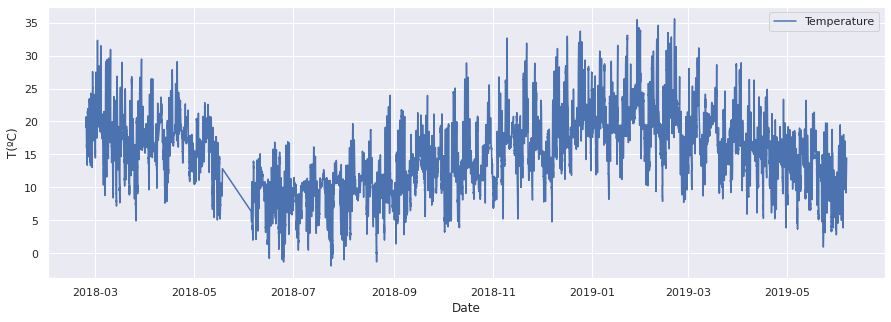

In [33]:
plt.figure(figsize = (15,5))
plt.plot(datos.fecha, datos.TA4, label = 'Temperature')
plt.xlabel('Date')
plt.ylabel('T(ºC)')
# plt.xlim(datetime.date(1990,1,1), datetime.date(2018,1,1))
# plt.ylim(-10,40)
plt.legend()
plt.show()

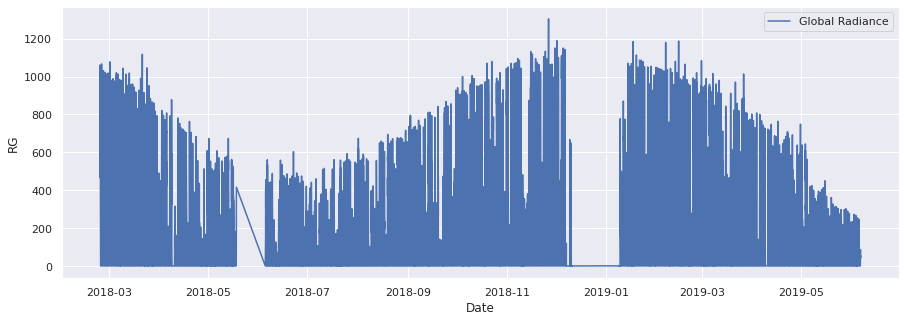

In [34]:
plt.figure(figsize = (15,5))
plt.plot(datos.fecha, datos.RG, label = 'Global Radiance')
plt.xlabel('Date')
plt.ylabel('RG')
# plt.xlim(datetime.date(1990,1,1), datetime.date(2018,1,1))
# plt.ylim(-10,40)
plt.legend()
plt.show()

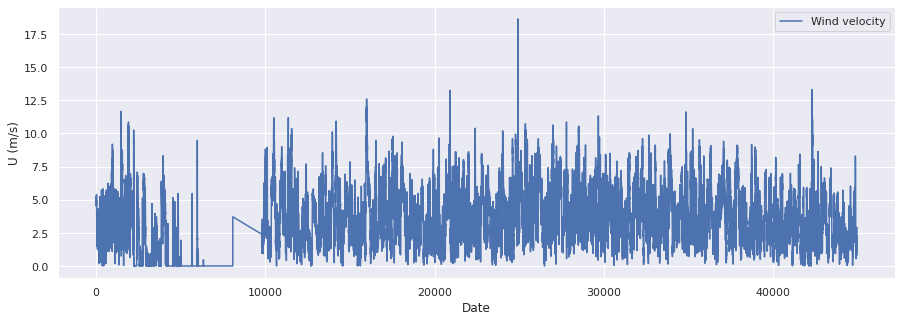

In [35]:
plt.figure(figsize = (15,5))
plt.plot(datos.index, datos.U, label = 'Wind velocity')
plt.xlabel('Date')
plt.ylabel('U (m/s)')
# plt.xlim(datetime.date(1990,1,1), datetime.date(2018,1,1))
# plt.ylim(-10,40)
plt.legend()
plt.show()

## Resampleo para tener un dato por dia en el gráfico

In [36]:
diario_mean = data5.resample('D', on = 'fecha').mean()
diario_mean.head()

,Dia juliano,U,TA1,HR1,TA3,HR3,TA4,HR4,RG
fecha,,,,,,,,,
2018-02-23,54.0,3.801300,18.675500,58.931667,19.163000,58.635667,18.840000,58.546167,512.030750
2018-02-24,55.0,2.579719,18.240625,69.654896,18.400208,69.829167,18.386667,69.412188,277.844990
2018-02-25,56.0,2.634688,19.222083,71.103750,19.018646,71.597292,19.330833,71.149896,329.729260
2018-02-26,57.0,2.699260,18.967917,71.052083,18.835729,71.240938,19.106250,71.010937,333.769656
2018-02-27,58.0,2.493792,20.017500,72.825521,19.984583,72.768646,20.132813,73.059688,321.597562


In [37]:
diario_min = data5.resample('D', on = 'fecha').min()
diario_min.head()

,fecha,Dia juliano,U,TA1,HR1,TA3,HR3,TA4,HR4,RG
fecha,,,,,,,,,,
2018-02-23,2018-02-23 08:45:00,54.0,1.476,15.87,50.42,15.52,48.39,16.02,50.00,0.010
2018-02-24,2018-02-24 00:00:00,55.0,1.121,13.22,57.33,13.17,56.16,13.37,57.31,0.010
2018-02-25,2018-02-25 00:00:00,56.0,0.182,14.42,52.44,12.29,50.71,14.64,52.77,0.013
2018-02-26,2018-02-26 00:00:00,57.0,0.276,13.06,40.48,12.11,40.45,13.29,40.43,0.010
2018-02-27,2018-02-27 00:00:00,58.0,0.000,12.87,37.41,12.42,37.40,13.03,38.26,0.010


In [38]:
diario_max = data5.resample('D', on = 'fecha').max()
diario_max.head()

,fecha,Dia juliano,U,TA1,HR1,TA3,HR3,TA4,HR4,RG
fecha,,,,,,,,,,
2018-02-23,2018-02-23 23:45:00,54.0,5.389,20.45,72.29,21.60,73.86,20.71,71.68,1061.0
2018-02-24,2018-02-24 23:45:00,55.0,4.306,21.81,83.60,22.77,83.40,21.95,83.00,1067.0
2018-02-25,2018-02-25 23:45:00,56.0,5.222,23.39,90.40,24.54,89.70,23.43,90.40,1031.0
2018-02-26,2018-02-26 23:45:00,57.0,5.735,24.20,90.40,25.11,89.90,24.30,90.30,1023.0
2018-02-27,2018-02-27 23:45:00,58.0,5.817,27.50,91.20,28.39,90.00,27.57,91.20,1014.0


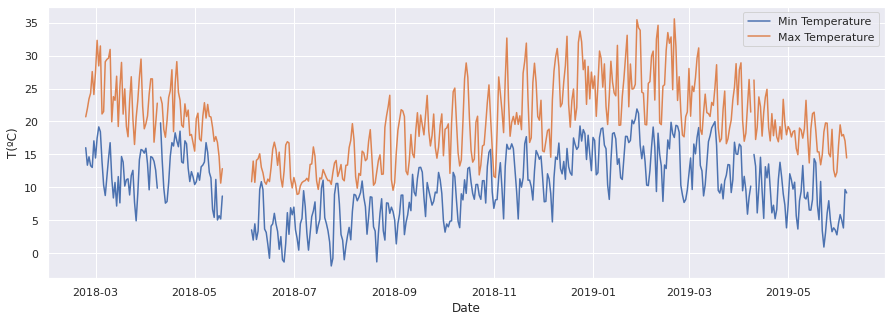

In [39]:
plt.figure(figsize = (15,5))
plt.plot(diario_min.index, diario_min.TA4, label = 'Min Temperature')
plt.plot(diario_max.index, diario_max.TA4, label = 'Max Temperature')
plt.xlabel('Date')
plt.ylabel('T(ºC)')
# plt.xlim(datetime.date(1990,1,1), datetime.date(2018,1,1))
# plt.ylim(-10,40)
plt.legend()
plt.show()

## Defino el dataset sobre el que vamos a trabajar

Me quedo con el dataset antes de eliminar datos faltantes para chequear consistencia de instancias con el archivo de flujos

In [40]:
datos = data4 

## Para calcular la Presión real de vapor de agua (ea)

Primero hay que calcular la presión de saturación de vapor: $ e_0(T) = 0.6108 \cdot \exp\big(\frac{17.27 \cdot T}{T+237.3}\big)$

La humedad relativa ($HR$) expresa el grado de saturación del aire como el cociente
entre la presión real de vapor ($ea$) a una temperatura dada y la presión de saturación de
vapor ($e_0(T)$) a la misma temperatura (T):

$HR = \frac{ea}{e_0(T)} \cdot 100$


La presion real de vapor la calculo usando como dato la humedad relativa.


In [41]:
e0 = 0.6108*np.exp(17.27*datos['TA4'].values.astype(float)/(datos['TA4'].values.astype(float)+237.3))

In [42]:
print(e0)

[2.21665919 2.24164662 2.27110975 ... 1.62472518 1.641638   1.64802   ]


In [43]:
e0.shape

(44946,)

In [44]:
e0 = pd.DataFrame(e0,columns = ['e0'])

In [45]:
e0.head()

,e0
0,2.216659
1,2.241647
2,2.271110
3,2.283840
4,2.299484


In [46]:
datos = datos.join(e0)

In [47]:
datos.head()

,fecha,Dia juliano,U,TA1,HR1,TA3,HR3,TA4,HR4,RG,e0
0,2018-02-23 08:45:00,54.0,4.701,19.00,60.46,19.35,61.28,19.14,60.54,469.4,2.216659
1,2018-02-23 09:00:00,54.0,5.088,19.18,59.93,19.64,60.31,19.32,59.98,525.4,2.241647
2,2018-02-23 09:15:00,54.0,5.180,19.40,58.66,19.92,58.90,19.53,58.76,585.1,2.271110
3,2018-02-23 09:30:00,54.0,5.217,19.47,57.12,20.07,57.17,19.62,57.23,640.6,2.283840
4,2018-02-23 09:45:00,54.0,5.059,19.56,57.82,20.26,57.41,19.73,57.89,705.7,2.299484


In [48]:
datos.shape

(44946, 11)

In [49]:
datos.columns

Index(['fecha', 'Dia juliano', 'U', 'TA1', 'HR1', 'TA3', 'HR3', 'TA4', 'HR4',
       'RG', 'e0'],
      dtype='object')

In [50]:
datos['ea'] = datos['HR4'].values.astype(float)*datos['e0'].values.astype(float)/100

In [51]:
datos.head()

,fecha,Dia juliano,U,TA1,HR1,TA3,HR3,TA4,HR4,RG,e0,ea
0,2018-02-23 08:45:00,54.0,4.701,19.00,60.46,19.35,61.28,19.14,60.54,469.4,2.216659,1.341965
1,2018-02-23 09:00:00,54.0,5.088,19.18,59.93,19.64,60.31,19.32,59.98,525.4,2.241647,1.344540
2,2018-02-23 09:15:00,54.0,5.180,19.40,58.66,19.92,58.90,19.53,58.76,585.1,2.271110,1.334504
3,2018-02-23 09:30:00,54.0,5.217,19.47,57.12,20.07,57.17,19.62,57.23,640.6,2.283840,1.307042
4,2018-02-23 09:45:00,54.0,5.059,19.56,57.82,20.26,57.41,19.73,57.89,705.7,2.299484,1.331171



## Ahora quiero calcular Rin y Rli. Para eso tengo que hacer cálculos a partir del dato de Radiación global

## Breve resumen de cómo estimar las radiaciones

### Radiación extraterrestre
$ R_a = 24(60)/ \pi \cdot G_{sc} \cdot dr \cdot  [ts  \cdot sen(phi) sen(delta)+ cos(phi) cos(delta) sen(ts)]$

donde $24(60)/ \pi \cdot G_{sc} = 37.59 M J m^{-2}dia^{-1}$

### Radiacion solar o global

$ R_S = R_G $

También puede calcularse a partir de la Radiación extraterrestre: $R_{S} = (a_s + b_s \cdot n/N)R_a$
donde n/N es la duración real de insolación.

### Radiación solar de un día despejado

$R_{SO} = (a_s + b_s) R_a$ en el nivel del mar

Si los valores de $a_s$ y $b_s$ no están calibrados usar: $R_{SO} = 0.75 \cdot R_a$ 


### Radiacion neta de onda corta

$ R_{nc} = (1-\alpha) R_S $ donde $\alpha$ es el albedo (0.23 para un cultivo de referencia)

### Radiación neta de onda larga 

$ R_{nl} = \sigma \big(\frac{T_{min}^4+T_{max}^4}{2}\big)\big(0.64-0.14 \cdot ea^{1/2}\big) \big( 1.35 \cdot \frac{R_s}{R_{so} }- 0.35 \big)$


donde :

- $\sigma$ es la constante de Boltzmann
- $T_{max}$ y $T_{min}$ son las temperaturas maximas y minimas absolutas en un periodo de 24hs
- $ea$ es la presion de vapor real
- $R_S/R_{S0}$ es la radiacion relativa de onda corta 


Para calcular $R_{nc}$ uso $R_S$ y supongo que el albedo es 0.23, pero para calcular $R_{nl}$ me falta conocer $R_{S0}$.
Por eso calculo primero $R_a$.


In [52]:
# Latitud
grados = 37
minutos = 55

#Grados decimales
grados_dec = grados + minutos/60

#Grados decimales en radianes
phi = np.pi*grados_dec/180

In [53]:
# Dia juliano

J = data5[['Dia juliano']] 

# La distancia relativa inversa Tierra-Sol, dr
dr = 1+0.033*np.cos(2*np.pi*J/365)

# Declinación solar, delta
delta = 0.409*np.sin(2*np.pi*J/365-1.39)

# El ángulo de radiación a la hora de la puesta del sol, ts
ts = np.arccos(np.tan(phi)*np.tan(delta))

# Horas de insolación máxima
N = (24/np.pi)*ts


In [54]:
# Radiación extraterrestre

Ra = 37.59*dr*(ts*np.sin(phi)*np.sin(delta)+np.cos(phi)*np.cos(delta)*np.sin(ts))

In [55]:
datos['Ra'] = pd.DataFrame(Ra)


In [56]:
datos.head()


,fecha,Dia juliano,U,TA1,HR1,TA3,HR3,TA4,HR4,RG,e0,ea,Ra
0,2018-02-23 08:45:00,54.0,4.701,19.00,60.46,19.35,61.28,19.14,60.54,469.4,2.216659,1.341965,22.137204
1,2018-02-23 09:00:00,54.0,5.088,19.18,59.93,19.64,60.31,19.32,59.98,525.4,2.241647,1.344540,22.137204
2,2018-02-23 09:15:00,54.0,5.180,19.40,58.66,19.92,58.90,19.53,58.76,585.1,2.271110,1.334504,22.137204
3,2018-02-23 09:30:00,54.0,5.217,19.47,57.12,20.07,57.17,19.62,57.23,640.6,2.283840,1.307042,22.137204
4,2018-02-23 09:45:00,54.0,5.059,19.56,57.82,20.26,57.41,19.73,57.89,705.7,2.299484,1.331171,22.137204


## Quería estimar $R_S$ con la fórmula que uso para $R_{S0}$ pero no se como estimar n/N el número real de hroas de insolación

In [57]:
datos['RG'] = datos['RG'].values.astype(float)
datos['Rnc'] = 0.77*datos['RG']

datos['ea'] = datos['ea'].values.astype(float)

datos['RS0'] = 0.75*datos['Ra'].values.astype(float)

## Calculo la temperatura minima y la maxima por dia 

In [58]:
Tmin_por_dia = datos.TA4.groupby([datos['Dia juliano']]).min()
Tmax_por_dia = datos.TA4.groupby([datos['Dia juliano']]).max()

datos['Tmin'] = datos['Dia juliano'].map(Tmin_por_dia)
datos['Tmax'] = datos['Dia juliano'].map(Tmax_por_dia)
datos.head()

,fecha,Dia juliano,U,TA1,HR1,TA3,HR3,TA4,HR4,RG,e0,ea,Ra,Rnc,RS0,Tmin,Tmax
0,2018-02-23 08:45:00,54.0,4.701,19.00,60.46,19.35,61.28,19.14,60.54,469.4,2.216659,1.341965,22.137204,361.438,16.602903,16.02,26.79
1,2018-02-23 09:00:00,54.0,5.088,19.18,59.93,19.64,60.31,19.32,59.98,525.4,2.241647,1.344540,22.137204,404.558,16.602903,16.02,26.79
2,2018-02-23 09:15:00,54.0,5.180,19.40,58.66,19.92,58.90,19.53,58.76,585.1,2.271110,1.334504,22.137204,450.527,16.602903,16.02,26.79
3,2018-02-23 09:30:00,54.0,5.217,19.47,57.12,20.07,57.17,19.62,57.23,640.6,2.283840,1.307042,22.137204,493.262,16.602903,16.02,26.79
4,2018-02-23 09:45:00,54.0,5.059,19.56,57.82,20.26,57.41,19.73,57.89,705.7,2.299484,1.331171,22.137204,543.389,16.602903,16.02,26.79


In [59]:
datos['Rnl'] = ((datos['Tmin']**4 + datos['Tmax']**4)/2)*(0.64-0.14*datos['ea']**(1/2))*(1.35*datos['RG']/datos['RS0']-0.35)

In [60]:
datos.head()

,fecha,Dia juliano,U,TA1,HR1,TA3,HR3,TA4,HR4,RG,e0,ea,Ra,Rnc,RS0,Tmin,Tmax,Rnl
0,2018-02-23 08:45:00,54.0,4.701,19.00,60.46,19.35,61.28,19.14,60.54,469.4,2.216659,1.341965,22.137204,361.438,16.602903,16.02,26.79,5.248976e+06
1,2018-02-23 09:00:00,54.0,5.088,19.18,59.93,19.64,60.31,19.32,59.98,525.4,2.241647,1.344540,22.137204,404.558,16.602903,16.02,26.79,5.879067e+06
2,2018-02-23 09:15:00,54.0,5.180,19.40,58.66,19.92,58.90,19.53,58.76,585.1,2.271110,1.334504,22.137204,450.527,16.602903,16.02,26.79,6.560937e+06
3,2018-02-23 09:30:00,54.0,5.217,19.47,57.12,20.07,57.17,19.62,57.23,640.6,2.283840,1.307042,22.137204,493.262,16.602903,16.02,26.79,7.213030e+06
4,2018-02-23 09:45:00,54.0,5.059,19.56,57.82,20.26,57.41,19.73,57.89,705.7,2.299484,1.331171,22.137204,543.389,16.602903,16.02,26.79,7.926638e+06


## Ahora resampleo a datos por dia

In [61]:
datos_mean = datos.resample('D', on = 'fecha').mean()
datos_mean.head()

,Dia juliano,U,TA1,HR1,TA3,HR3,TA4,HR4,RG,e0,ea,Ra,Rnc,RS0,Tmin,Tmax,Rnl
fecha,,,,,,,,,,,,,,,,,
2018-02-23,54.0,3.801300,18.675500,58.931667,19.163000,58.635667,18.840000,58.546167,512.030750,2.186134,1.265285,22.137204,394.263677,16.602903,16.020,26.79,5.785612e+06
2018-02-24,55.0,2.579719,18.240625,69.654896,18.400208,69.829167,18.386667,69.412188,277.844990,2.139963,1.461246,22.455203,213.940642,16.841402,10.340,21.95,1.245459e+06
2018-02-25,56.0,2.634688,19.222083,71.103750,19.018646,71.597292,19.330833,71.149896,329.729260,2.279973,1.564225,22.772165,253.891531,17.079124,8.860,23.43,1.837664e+06
2018-02-26,57.0,2.699260,18.967917,71.052083,18.835729,71.240938,19.106250,71.010937,333.769656,2.266418,1.530457,23.087911,257.002635,17.315933,7.718,24.30,2.106729e+06
2018-02-27,58.0,2.493792,20.017500,72.825521,19.984583,72.768646,20.132813,73.059688,321.597562,2.443679,1.678110,23.402263,247.630123,17.551697,8.160,27.57,3.246882e+06


## Levanto datos del archivo de flujos

In [62]:
eddy = pd.read_excel('Eddy Covariance_flujos.xlsx', na_values=[99.99, 99.999],engine='openpyxl')

In [63]:
eddy['fecha'] = pd.to_datetime(eddy.Tbegin, dayfirst=True)


In [64]:
eddy.head()

,Tbegin,Tend,u[m/s],Ts[degC],a[g/m3],p_ref[hPa],Var[u],Var[Ts],Var[a],dir[deg],...,LvE[W/m2],z/L,z/L-virt,Flag(ustar),Flag(HTs),Flag(LvE),r_err_ustar[%],r_err_HTs[%],r_err_LvE[%],fecha
0,04.04.2018 15:00,04.04.2018 15:15,4.716045,25.841785,16.273056,1007.983887,1.987194,0.371829,0.141516,80.047150,...,169.873474,-0.025962,-0.026996,1,1,1,4.670649,9.254954,10.594435,2018-04-04 15:00:00
1,04.04.2018 15:15,04.04.2018 15:30,4.576623,25.930080,16.151613,1007.934082,1.646239,0.362306,0.114813,67.685120,...,154.147125,-0.029771,-0.030896,1,1,1,4.776311,8.649222,9.611935,2018-04-04 15:15:00
2,04.04.2018 15:30,04.04.2018 15:45,4.812004,25.831949,16.041658,1007.821777,1.832203,0.293108,0.110924,76.839516,...,176.665100,-0.024403,-0.025685,1,1,1,4.554177,9.783492,10.641099,2018-04-04 15:30:00
3,04.04.2018 15:45,04.04.2018 16:00,4.801859,25.861732,16.023844,1007.753479,1.984049,0.185763,0.084146,76.573311,...,140.473144,-0.017032,-0.017953,1,1,1,4.162145,8.595140,10.155835,2018-04-04 15:45:00
4,04.04.2018 16:00,04.04.2018 16:15,4.403169,25.958181,15.918113,1007.676697,1.913207,0.192301,0.121955,76.900284,...,146.903854,-0.017497,-0.018629,1,1,1,4.787089,9.294574,10.104331,2018-04-04 16:00:00


In [65]:
#eddy['fecha2'] = pd.to_datetime({'year':pd.DatetimeIndex(eddy.fecha).year, 'month': pd.DatetimeIndex(eddy.fecha).month, 'day': pd.DatetimeIndex(eddy.fecha).day, 'hour':pd.DatetimeIndex(eddy.fecha).hour, 'minute':pd.DatetimeIndex(eddy.fecha).minute})


In [66]:
eddy['Dia juliano'] = pd.DatetimeIndex(eddy['fecha']).strftime('%j')


In [67]:
eddy.head()

,Tbegin,Tend,u[m/s],Ts[degC],a[g/m3],p_ref[hPa],Var[u],Var[Ts],Var[a],dir[deg],...,z/L,z/L-virt,Flag(ustar),Flag(HTs),Flag(LvE),r_err_ustar[%],r_err_HTs[%],r_err_LvE[%],fecha,Dia juliano
0,04.04.2018 15:00,04.04.2018 15:15,4.716045,25.841785,16.273056,1007.983887,1.987194,0.371829,0.141516,80.047150,...,-0.025962,-0.026996,1,1,1,4.670649,9.254954,10.594435,2018-04-04 15:00:00,094
1,04.04.2018 15:15,04.04.2018 15:30,4.576623,25.930080,16.151613,1007.934082,1.646239,0.362306,0.114813,67.685120,...,-0.029771,-0.030896,1,1,1,4.776311,8.649222,9.611935,2018-04-04 15:15:00,094
2,04.04.2018 15:30,04.04.2018 15:45,4.812004,25.831949,16.041658,1007.821777,1.832203,0.293108,0.110924,76.839516,...,-0.024403,-0.025685,1,1,1,4.554177,9.783492,10.641099,2018-04-04 15:30:00,094
3,04.04.2018 15:45,04.04.2018 16:00,4.801859,25.861732,16.023844,1007.753479,1.984049,0.185763,0.084146,76.573311,...,-0.017032,-0.017953,1,1,1,4.162145,8.595140,10.155835,2018-04-04 15:45:00,094
4,04.04.2018 16:00,04.04.2018 16:15,4.403169,25.958181,15.918113,1007.676697,1.913207,0.192301,0.121955,76.900284,...,-0.017497,-0.018629,1,1,1,4.787089,9.294574,10.104331,2018-04-04 16:00:00,094


In [68]:
eddy = eddy.drop(['Tbegin','Tend          '],axis=1)

In [69]:
#print(eddy.loc[3860:3870,'fecha'])
#print(eddy.loc[14460:14470,:])


In [70]:
print(eddy.shape)
print(eddy.isnull().sum())

(21586, 21)
u[m/s]             1765
Ts[degC]           1765
a[g/m3]            3448
p_ref[hPa]            0
Var[u]             1769
Var[Ts]            1768
Var[a]             3509
dir[deg]           1769
ustar[m/s]         1769
HTs[W/m2]          2041
LvE[W/m2]          3624
z/L                1765
z/L-virt           1765
Flag(ustar)           0
Flag(HTs)             0
Flag(LvE)             0
 r_err_ustar[%]    1769
   r_err_HTs[%]    2042
   r_err_LvE[%]    3631
fecha                 0
Dia juliano           0
dtype: int64


In [71]:
#eddy_sn = eddy.dropna()
#eddy_sn.reset_index(drop=True)

#print(eddy_sn.shape)
#print(eddy_sn.isnull().sum())

In [72]:
#eddy.columns

## Miro el rango de fechas disponibles en el excel de flujos

In [73]:
fecha_min = eddy.loc[0,'fecha']
fecha_max = eddy.loc[(eddy.shape[0])-1,'fecha']

fecha_max = fecha_max.strftime("%Y-%m-%d %H:%M:%S")
fecha_min = fecha_min.strftime("%Y-%m-%d %H:%M:%S")

print(fecha_min)
print(fecha_max)

2018-04-04 15:00:00
2018-12-21 06:15:00


In [74]:
Tmin_por_dia = eddy['Ts[degC]       '].groupby([eddy['Dia juliano']]).min()
Tmax_por_dia = eddy['Ts[degC]       '].groupby([eddy['Dia juliano']]).max()

eddy['T_min'] = eddy['Dia juliano'].map(Tmin_por_dia)
eddy['T_max'] = eddy['Dia juliano'].map(Tmax_por_dia)
eddy.head()



,u[m/s],Ts[degC],a[g/m3],p_ref[hPa],Var[u],Var[Ts],Var[a],dir[deg],ustar[m/s],HTs[W/m2],...,Flag(ustar),Flag(HTs),Flag(LvE),r_err_ustar[%],r_err_HTs[%],r_err_LvE[%],fecha,Dia juliano,T_min,T_max
0,4.716045,25.841785,16.273056,1007.983887,1.987194,0.371829,0.141516,80.047150,0.538547,153.458633,...,1,1,1,4.670649,9.254954,10.594435,2018-04-04 15:00:00,094,18.054382,25.958181
1,4.576623,25.930080,16.151613,1007.934082,1.646239,0.362306,0.114813,67.685120,0.503477,143.777115,...,1,1,1,4.776311,8.649222,9.611935,2018-04-04 15:15:00,094,18.054382,25.958181
2,4.812004,25.831949,16.041658,1007.821777,1.832203,0.293108,0.110924,76.839516,0.525962,134.341782,...,1,1,1,4.554177,9.783492,10.641099,2018-04-04 15:30:00,094,18.054382,25.958181
3,4.801859,25.861732,16.023844,1007.753479,1.984049,0.185763,0.084146,76.573311,0.546161,104.979362,...,1,1,1,4.162145,8.595140,10.155835,2018-04-04 15:45:00,094,18.054382,25.958181
4,4.403169,25.958181,15.918113,1007.676697,1.913207,0.192301,0.121955,76.900284,0.527285,97.032967,...,1,1,1,4.787089,9.294574,10.104331,2018-04-04 16:00:00,094,18.054382,25.958181


In [75]:
df = eddy
print(eddy.shape)

remove_dates = (df["fecha"] < fecha_min) | (df["fecha"] > fecha_max)

print(remove_dates.astype(int).values.sum())
filtered_eddy = df.loc[~remove_dates,:]
print(filtered_eddy.shape)
fuera_eddy = df.loc[remove_dates,:]
print(fuera_eddy.shape)
#df[remove_dates].head()

(21586, 23)
0
(21586, 23)
(0, 23)


In [76]:
#eddy_sel = eddy.drop([' '],axis=1)

## Filtro los Datos meteorologicos por las fechas del archivo excel de flujos 

In [77]:
df = datos
remove_dates = (df["fecha"] < fecha_min) | (df["fecha"] > fecha_max)

#remove_dates = np.logical_or(df["fecha"] < fecha_min, df["fecha"] > fecha_max)
filtered_datos = df.loc[~remove_dates,:].reset_index()
fuera_datos = df.loc[remove_dates,:].reset_index()

print(remove_dates.astype(int).values.sum())
print(data4.shape)
print(filtered_datos.shape)
print(fuera_datos.shape)
print(data4.shape[0]-fuera_datos.shape[0])
print(28890-3869+1) # Chequeo a mano del excel


19924
(44946, 10)
(25022, 19)
(19924, 19)
25022
25022


In [78]:
#print(fuera_datos.loc[3860:3870,'fecha'])


## Ahora tenfo en filtered_datos y filtered_eddy los datos de los dos excel pero filtrados para tener el mismo rango de fechas

Miramos cantidad de datos faltantes

In [79]:
print(filtered_datos.shape)
print(filtered_datos.isnull().sum())


(25022, 19)
index             0
fecha             0
Dia juliano      96
U              1973
TA1            1973
HR1            1973
TA3            1973
HR3            1974
TA4            1973
HR4            1973
RG             1975
e0             1973
ea             1973
Ra             2072
Rnc            1975
RS0            2072
Tmin             96
Tmax             96
Rnl            2072
dtype: int64


In [80]:
print(filtered_eddy.shape)
print(filtered_eddy.isnull().sum())

(21586, 23)
u[m/s]             1765
Ts[degC]           1765
a[g/m3]            3448
p_ref[hPa]            0
Var[u]             1769
Var[Ts]            1768
Var[a]             3509
dir[deg]           1769
ustar[m/s]         1769
HTs[W/m2]          2041
LvE[W/m2]          3624
z/L                1765
z/L-virt           1765
Flag(ustar)           0
Flag(HTs)             0
Flag(LvE)             0
 r_err_ustar[%]    1769
   r_err_HTs[%]    2042
   r_err_LvE[%]    3631
fecha                 0
Dia juliano           0
T_min               288
T_max               288
dtype: int64


In [81]:
filtered_datos_sn = filtered_datos.dropna()
filtered_datos_sn.reset_index(drop=True)

print(filtered_datos_sn.shape)
print(filtered_datos_sn.isnull().sum())


(22950, 19)
index          0
fecha          0
Dia juliano    0
U              0
TA1            0
HR1            0
TA3            0
HR3            0
TA4            0
HR4            0
RG             0
e0             0
ea             0
Ra             0
Rnc            0
RS0            0
Tmin           0
Tmax           0
Rnl            0
dtype: int64


In [82]:
filtered_eddy_sn = filtered_eddy.dropna()
filtered_eddy_sn.reset_index(drop=True)

print(filtered_eddy_sn.shape)
print(filtered_eddy_sn.isnull().sum())

(17935, 23)
u[m/s]             0
Ts[degC]           0
a[g/m3]            0
p_ref[hPa]         0
Var[u]             0
Var[Ts]            0
Var[a]             0
dir[deg]           0
ustar[m/s]         0
HTs[W/m2]          0
LvE[W/m2]          0
z/L                0
z/L-virt           0
Flag(ustar)        0
Flag(HTs)          0
Flag(LvE)          0
 r_err_ustar[%]    0
   r_err_HTs[%]    0
   r_err_LvE[%]    0
fecha              0
Dia juliano        0
T_min              0
T_max              0
dtype: int64


In [106]:
z=6;
d=2.6/3;
zo=0.123*6;
zoh=0.0123*6;
k=0.4

In [208]:
met=filtered_datos_sn.copy().set_index('fecha')
eddy=filtered_eddy_sn.copy().set_index('fecha')

In [209]:
eddy.tail()

,u[m/s],Ts[degC],a[g/m3],p_ref[hPa],Var[u],Var[Ts],Var[a],dir[deg],ustar[m/s],HTs[W/m2],...,z/L-virt,Flag(ustar),Flag(HTs),Flag(LvE),r_err_ustar[%],r_err_HTs[%],r_err_LvE[%],Dia juliano,T_min,T_max
fecha,,,,,,,,,,,,,,,,,,,,,
2018-12-21 01:00:00,2.409498,18.693722,6.138138,1008.089356,0.529862,0.000000,3.962059,196.573242,0.269423,-7.117419,...,0.006805,1,1,1,5.772183,11.459846,214.200134,355,17.807041,18.80752
2018-12-21 01:15:00,3.056202,18.538530,1.983687,1007.843750,0.589052,0.000000,6.392461,205.497559,0.324111,3.346276,...,0.004796,1,1,7,4.728066,14.550011,49.134842,355,17.807041,18.80752
2018-12-21 01:30:00,3.007928,18.511381,1.686376,1007.623901,0.601561,0.000000,8.175329,211.336136,0.294528,-16.632877,...,0.005678,1,5,1,5.319317,15.944920,45.236126,355,17.807041,18.80752
2018-12-21 01:45:00,3.169008,18.398289,0.960651,1007.453369,0.773998,0.004571,0.382378,216.459946,0.331261,-5.038134,...,0.003894,1,1,7,4.498866,16.171490,337.739136,355,17.807041,18.80752
2018-12-21 03:00:00,3.664259,18.101801,1.219884,1006.641907,1.194682,0.064781,0.000511,214.968933,0.491879,19.312626,...,-0.004259,1,1,7,2.826907,8.233249,258.801727,355,17.807041,18.80752


In [210]:
merge=pd.merge(met,eddy, how='left', left_index=True, right_index=True)
merge.head()

,index,Dia juliano_x,U,TA1,HR1,TA3,HR3,TA4,HR4,RG,...,z/L-virt,Flag(ustar),Flag(HTs),Flag(LvE),r_err_ustar[%],r_err_HTs[%],r_err_LvE[%],Dia juliano_y,T_min,T_max
fecha,,,,,,,,,,,,,,,,,,,,,
2018-04-04 15:00:00,3865,94.0,6.122,25.91,46.37,26.62,48.27,26.00,47.44,637.8,...,-0.026996,1.0,1.0,1.0,4.670649,9.254954,10.594435,094,18.054382,25.958181
2018-04-04 15:15:00,3866,94.0,5.376,26.14,45.47,26.79,47.45,26.21,46.46,602.3,...,-0.030896,1.0,1.0,1.0,4.776311,8.649222,9.611935,094,18.054382,25.958181
2018-04-04 15:30:00,3867,94.0,5.301,26.33,44.81,26.95,46.70,26.37,45.87,566.6,...,-0.025685,1.0,1.0,1.0,4.554177,9.783492,10.641099,094,18.054382,25.958181
2018-04-04 15:45:00,3868,94.0,5.630,26.15,44.72,26.76,46.50,26.25,45.72,525.1,...,-0.017953,1.0,1.0,1.0,4.162145,8.595140,10.155835,094,18.054382,25.958181
2018-04-04 16:00:00,3869,94.0,5.454,26.25,44.42,26.81,46.15,26.35,45.35,483.6,...,-0.018629,1.0,1.0,1.0,4.787089,9.294574,10.104331,094,18.054382,25.958181


In [211]:
merge.dropna(inplace=True)

In [212]:
merge.tail()

,index,Dia juliano_x,U,TA1,HR1,TA3,HR3,TA4,HR4,RG,...,z/L-virt,Flag(ustar),Flag(HTs),Flag(LvE),r_err_ustar[%],r_err_HTs[%],r_err_LvE[%],Dia juliano_y,T_min,T_max
fecha,,,,,,,,,,,,,,,,,,,,,
2018-12-21 01:15:00,28862,355.0,2.778,18.76,91.5,18.97,90.1,19.06,90.9,0.003,...,0.004796,1.0,1.0,7.0,4.728066,14.550011,49.134842,355,17.807041,18.80752
2018-12-21 01:15:00,28866,355.0,2.898,18.33,92.1,18.56,90.5,18.64,91.7,0.000,...,0.004796,1.0,1.0,7.0,4.728066,14.550011,49.134842,355,17.807041,18.80752
2018-12-21 01:30:00,28867,355.0,3.566,18.24,92.4,18.48,90.7,18.58,92.0,0.000,...,0.005678,1.0,5.0,1.0,5.319317,15.944920,45.236126,355,17.807041,18.80752
2018-12-21 01:45:00,28868,355.0,3.350,18.16,92.5,18.37,91.0,18.48,92.2,0.000,...,0.003894,1.0,1.0,7.0,4.498866,16.171490,337.739136,355,17.807041,18.80752
2018-12-21 03:00:00,28873,355.0,4.187,17.75,93.1,17.93,92.0,18.06,92.8,0.000,...,-0.004259,1.0,1.0,7.0,2.826907,8.233249,258.801727,355,17.807041,18.80752


In [213]:
Press= 101.3*((293-(0.0065)*6)/293)**5.26; 
merge['es']=0.6108**((17.27*merge.TA1)/(merge.TA1+237.3))
merge['Delta']= (4098.*merge.es)/((merge.TA1+237.3)**2)#kPa C-1]
Lambda=2.45;
R = 0.28704
merge['e'] = merge.es*merge.HR1/100
Cp=1.013*10**(-3)
Sigma=((Cp*Press)/(0.622*Lambda))
merge['epsilon']=merge.Delta/Sigma
merge['Rho_air']=(Press/(1.01*(merge.TA1+273.15))*R);        
#Qa = 0.62197*e/((Press/100)-(0.378030*e));  
Ra_ustar=merge.U/merge['ustar[m/s]     ']**2
LE=merge['LvE[W/m2]      ']
H=merge['HTs[W/m2]      ']

In [214]:
merge.head()

,index,Dia juliano_x,U,TA1,HR1,TA3,HR3,TA4,HR4,RG,...,r_err_HTs[%],r_err_LvE[%],Dia juliano_y,T_min,T_max,es,Delta,e,epsilon,Rho_air
fecha,,,,,,,,,,,,,,,,,,,,,
2018-04-04 15:00:00,3865,94.0,6.122,25.91,46.37,26.62,48.27,26.00,47.44,637.8,...,9.254954,10.594435,094,18.054382,25.958181,0.432535,0.025585,0.200566,0.380216,0.096198
2018-04-04 15:15:00,3866,94.0,5.376,26.14,45.47,26.79,47.45,26.21,46.46,602.3,...,8.649222,9.611935,094,18.054382,25.958181,0.429646,0.025370,0.195360,0.377017,0.096125
2018-04-04 15:30:00,3867,94.0,5.301,26.33,44.81,26.95,46.70,26.37,45.87,566.6,...,9.783492,10.641099,094,18.054382,25.958181,0.427278,0.025194,0.191463,0.374399,0.096064
2018-04-04 15:45:00,3868,94.0,5.630,26.15,44.72,26.76,46.50,26.25,45.72,525.1,...,8.595140,10.155835,094,18.054382,25.958181,0.429521,0.025361,0.192082,0.376879,0.096121
2018-04-04 16:00:00,3869,94.0,5.454,26.25,44.42,26.81,46.15,26.35,45.35,483.6,...,9.294574,10.104331,094,18.054382,25.958181,0.428273,0.025268,0.190239,0.375499,0.096089


In [215]:
Sigma

0.06729120974297506

In [ ]:
Delta

In [216]:
merge['A']=(LE+H);  
merge['one']=merge.Delta*merge.A;   
merge['Ga_ustar']=1/Ra_ustar
merge['two']=merge.Rho_air*Cp**(10**6)*(merge.es-merge.e)**merge.Ga_ustar; 
merge['three']=(Sigma/merge.Delta);
merge['Rc']= merge.Ra*((((merge.one+two)/(Sigma*LE))-merge.three)-1)

In [217]:
merge.head()

,index,Dia juliano_x,U,TA1,HR1,TA3,HR3,TA4,HR4,RG,...,Delta,e,epsilon,Rho_air,A,one,Ga_ustar,two,three,Rc
fecha,,,,,,,,,,,,,,,,,,,,,
2018-04-04 15:00:00,3865,94.0,6.122,25.91,46.37,26.62,48.27,26.00,47.44,637.8,...,0.025585,0.200566,0.380216,0.096198,323.332107,8.272510,0.047376,0.0,2.630086,-94.740468
2018-04-04 15:15:00,3866,94.0,5.376,26.14,45.47,26.79,47.45,26.21,46.46,602.3,...,0.025370,0.195360,0.377017,0.096125,297.924240,7.558319,0.047152,0.0,2.652400,-95.305520
2018-04-04 15:30:00,3867,94.0,5.301,26.33,44.81,26.95,46.70,26.37,45.87,566.6,...,0.025194,0.191463,0.374399,0.096064,311.006882,7.835429,0.052186,0.0,2.670949,-98.177885
2018-04-04 15:45:00,3868,94.0,5.630,26.15,44.72,26.76,46.50,26.25,45.72,525.1,...,0.025361,0.192082,0.376879,0.096121,245.452507,6.224830,0.052983,0.0,2.653373,-97.623649
2018-04-04 16:00:00,3869,94.0,5.454,26.25,44.42,26.81,46.15,26.35,45.35,483.6,...,0.025268,0.190239,0.375499,0.096089,243.936821,6.163736,0.050977,0.0,2.663126,-99.082702


In [258]:
merge.isnull().sum()

fecha              0
index              0
Dia juliano_x      0
U                  0
TA1                0
HR1                0
TA3                0
HR3                0
TA4                0
HR4                0
RG                 0
e0                 0
ea                 0
Ra                 0
Rnc                0
RS0                0
Tmin               0
Tmax               0
Rnl                0
u[m/s]             0
Ts[degC]           0
a[g/m3]            0
p_ref[hPa]         0
Var[u]             0
Var[Ts]            0
Var[a]             0
dir[deg]           0
ustar[m/s]         0
HTs[W/m2]          0
LvE[W/m2]          0
z/L                0
z/L-virt           0
Flag(ustar)        0
Flag(HTs)          0
Flag(LvE)          0
 r_err_ustar[%]    0
   r_err_HTs[%]    0
   r_err_LvE[%]    0
Dia juliano_y      0
T_min              0
T_max              0
es                 0
Delta              0
e                  0
epsilon            0
Rho_air            0
A                  0
one          

In [218]:
import numpy as np
Ra=(np.log((z-d)/zo))*(np.log((z-d)/zoh))/(k**2*merge.U)

In [221]:
Ga=1/Ra
merge['Gs']=Ga/((merge.epsilon*merge.A)-(merge.epsilon-1)*(Ga*Cp*merge.Rho_air*(merge.e0-merge.ea)/Sigma))

In [154]:
met['GS']=Gs

In [223]:
merge.reset_index(inplace=True)

In [222]:
merge.columns

Index(['index', 'Dia juliano_x', 'U', 'TA1', 'HR1', 'TA3', 'HR3', 'TA4', 'HR4',
       'RG', 'e0', 'ea', 'Ra', 'Rnc', 'RS0', 'Tmin', 'Tmax', 'Rnl',
       'u[m/s]         ', 'Ts[degC]       ', 'a[g/m3]        ',
       'p_ref[hPa]     ', 'Var[u]         ', 'Var[Ts]        ',
       'Var[a]         ', 'dir[deg]       ', 'ustar[m/s]     ',
       'HTs[W/m2]      ', 'LvE[W/m2]      ', 'z/L            ',
       'z/L-virt       ', 'Flag(ustar)    ', 'Flag(HTs)      ',
       'Flag(LvE)      ', ' r_err_ustar[%]', '   r_err_HTs[%]',
       '   r_err_LvE[%]', 'Dia juliano_y', 'T_min', 'T_max', 'es', 'Delta',
       'e', 'epsilon', 'Rho_air', 'A', 'one', 'Ga_ustar', 'two', 'three', 'Rc',
       'Gs'],
      dtype='object')

In [224]:
merge['hour']=merge.fecha.dt.hour

In [231]:
merge['month']=merge.fecha.dt.month

In [159]:
met.hour.loc[met.hour==15].shape

(967,)

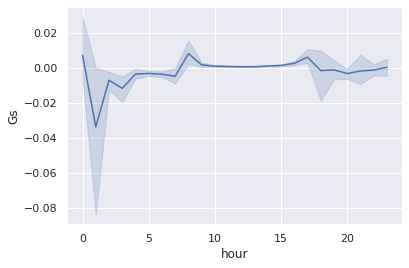

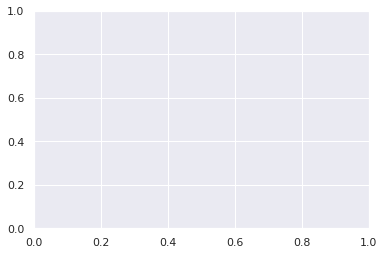

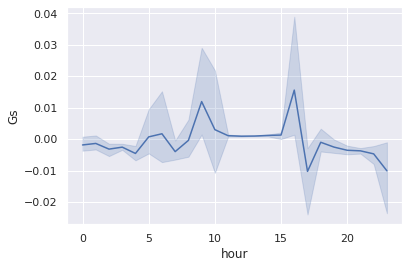

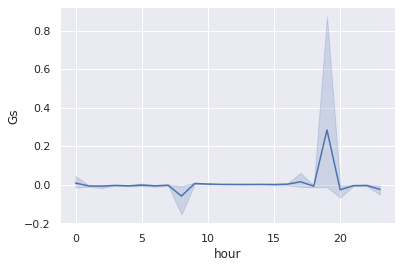

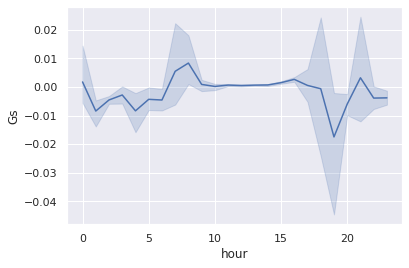

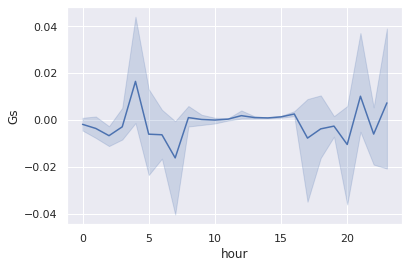

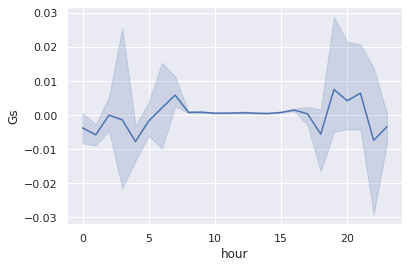

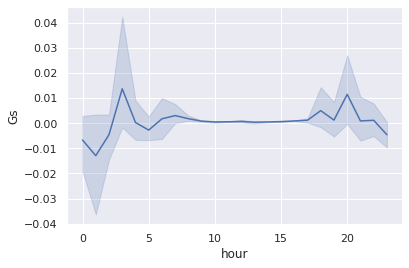

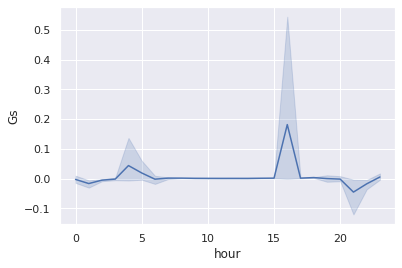

In [238]:
for i in range(4,13):
    sns.lineplot(x='hour',y='Gs',data=merge.loc[merge.month==i])
    plt.show()

<AxesSubplot:xlabel='month', ylabel='Gs'>

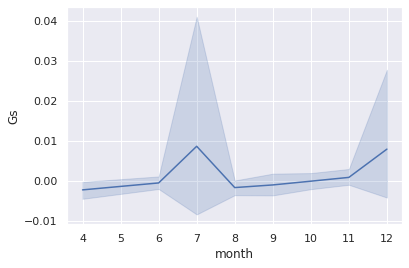

In [239]:
sns.lineplot(x='month',y='Gs',data=merge,sort=False)

In [244]:
merge.columns

Index(['fecha', 'index', 'Dia juliano_x', 'U', 'TA1', 'HR1', 'TA3', 'HR3',
       'TA4', 'HR4', 'RG', 'e0', 'ea', 'Ra', 'Rnc', 'RS0', 'Tmin', 'Tmax',
       'Rnl', 'u[m/s]         ', 'Ts[degC]       ', 'a[g/m3]        ',
       'p_ref[hPa]     ', 'Var[u]         ', 'Var[Ts]        ',
       'Var[a]         ', 'dir[deg]       ', 'ustar[m/s]     ',
       'HTs[W/m2]      ', 'LvE[W/m2]      ', 'z/L            ',
       'z/L-virt       ', 'Flag(ustar)    ', 'Flag(HTs)      ',
       'Flag(LvE)      ', ' r_err_ustar[%]', '   r_err_HTs[%]',
       '   r_err_LvE[%]', 'Dia juliano_y', 'T_min', 'T_max', 'es', 'Delta',
       'e', 'epsilon', 'Rho_air', 'A', 'one', 'Ga_ustar', 'two', 'three', 'Rc',
       'Gs', 'hour', 'month'],
      dtype='object')

In [241]:
import datetime as dt

In [247]:
merge.head()

,fecha,index,Dia juliano_x,U,TA1,HR1,TA3,HR3,TA4,HR4,...,Rho_air,A,one,Ga_ustar,two,three,Rc,Gs,hour,month
0,2018-04-04 15:00:00,3865,94.0,6.122,25.91,46.37,26.62,48.27,26.00,47.44,...,0.096198,323.332107,8.272510,0.047376,0.0,2.630086,-94.740468,0.000968,15,4
1,2018-04-04 15:15:00,3866,94.0,5.376,26.14,45.47,26.79,47.45,26.21,46.46,...,0.096125,297.924240,7.558319,0.047152,0.0,2.652400,-95.305520,0.000931,15,4
2,2018-04-04 15:30:00,3867,94.0,5.301,26.33,44.81,26.95,46.70,26.37,45.87,...,0.096064,311.006882,7.835429,0.052186,0.0,2.670949,-98.177885,0.000885,15,4
3,2018-04-04 15:45:00,3868,94.0,5.630,26.15,44.72,26.76,46.50,26.25,45.72,...,0.096121,245.452507,6.224830,0.052983,0.0,2.653373,-97.623649,0.001183,15,4
4,2018-04-04 16:00:00,3869,94.0,5.454,26.25,44.42,26.81,46.15,26.35,45.35,...,0.096089,243.936821,6.163736,0.050977,0.0,2.663126,-99.082702,0.001158,16,4


In [249]:
df=merge.loc[merge.hour>9]
df=df.loc[df.hour< 16]

In [259]:
df.isnull().sum()

fecha              0
index              0
Dia juliano_x      0
U                  0
TA1                0
HR1                0
TA3                0
HR3                0
TA4                0
HR4                0
RG                 0
e0                 0
ea                 0
Ra                 0
Rnc                0
RS0                0
Tmin               0
Tmax               0
Rnl                0
u[m/s]             0
Ts[degC]           0
a[g/m3]            0
p_ref[hPa]         0
Var[u]             0
Var[Ts]            0
Var[a]             0
dir[deg]           0
ustar[m/s]         0
HTs[W/m2]          0
LvE[W/m2]          0
z/L                0
z/L-virt           0
Flag(ustar)        0
Flag(HTs)          0
Flag(LvE)          0
 r_err_ustar[%]    0
   r_err_HTs[%]    0
   r_err_LvE[%]    0
Dia juliano_y      0
T_min              0
T_max              0
es                 0
Delta              0
e                  0
epsilon            0
Rho_air            0
A                  0
one          

In [250]:
datos_diario_mean = df.resample('D', on = 'fecha').mean()

In [257]:
datos_diario_mean.isnull( ).sum()

index              66
Dia juliano_x      66
U                  66
TA1                66
HR1                66
TA3                66
HR3                66
TA4                66
HR4                66
RG                 66
e0                 66
ea                 66
Ra                 66
Rnc                66
RS0                66
Tmin               66
Tmax               66
Rnl                66
u[m/s]             66
Ts[degC]           66
a[g/m3]            66
p_ref[hPa]         66
Var[u]             66
Var[Ts]            66
Var[a]             66
dir[deg]           66
ustar[m/s]         66
HTs[W/m2]          66
LvE[W/m2]          66
z/L                66
z/L-virt           66
Flag(ustar)        66
Flag(HTs)          66
Flag(LvE)          66
 r_err_ustar[%]    66
   r_err_HTs[%]    66
   r_err_LvE[%]    66
T_min              66
T_max              66
es                 66
Delta              66
e                  66
epsilon            66
Rho_air            66
A                  66
one       

In [269]:
datos_diario_mean.dropna(inplace=True)

<AxesSubplot:xlabel='month', ylabel='Gs'>

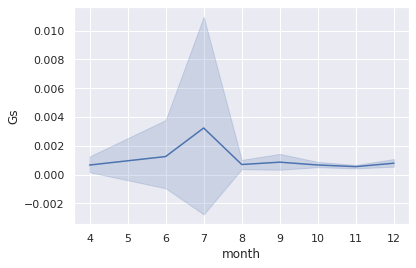

In [252]:
sns.lineplot(x='month',y='Gs',data=datos_diario_mean ,sort=False)

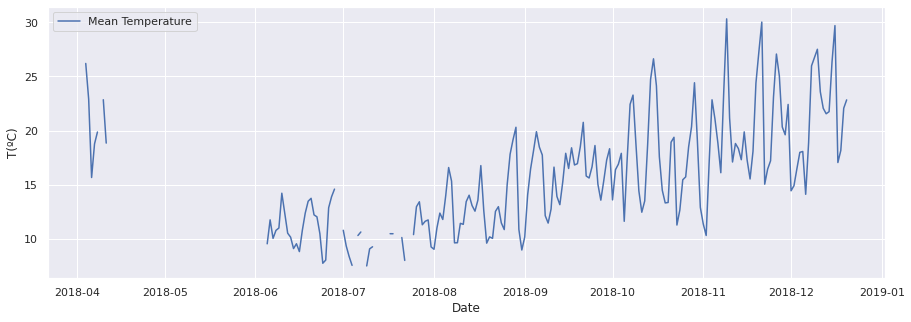

In [256]:
plt.figure(figsize = (15,5))
plt.plot(datos_diario_mean.index,datos_diario_mean['TA4'], label = 'Mean Temperature')
plt.xlabel('Date')
plt.ylabel('T(ºC)')
plt.legend()
plt.show()

## Ahora resampleamos a un dato por dia

In [83]:
datos_diario_mean = filtered_datos.resample('D', on = 'fecha').mean()


In [251]:
datos_diario_mean.shape

(261, 53)

In [85]:
datos_diario_mean.head()

,index,Dia juliano,U,TA1,HR1,TA3,HR3,TA4,HR4,RG,e0,ea,Ra,Rnc,RS0,Tmin,Tmax,Rnl
fecha,,,,,,,,,,,,,,,,,,
2018-04-04,3882.5,94.0,4.318611,22.172222,62.913611,22.298056,64.438333,22.336389,63.267222,140.214306,2.740193,1.659073,32.597253,107.965015,24.447940,11.670,26.47,875548.005457
2018-04-05,3948.5,95.0,4.168552,18.219479,69.156146,18.447813,69.750313,18.418229,69.121667,163.438063,2.155350,1.450131,32.770458,125.847308,24.577844,9.610,26.46,991698.184254
2018-04-06,4044.5,96.0,5.150125,15.221458,60.443333,15.308854,61.216563,15.398958,59.933958,51.521688,1.750950,1.042381,32.938557,39.671699,24.703918,5.938,22.37,156676.177359
2018-04-07,4140.5,97.0,1.405312,16.494479,79.668542,16.538438,79.357292,16.707187,79.241458,147.394187,1.914252,1.501716,33.101546,113.493524,24.826160,8.540,26.37,874797.412475
2018-04-08,4236.5,98.0,0.371427,16.242500,81.878646,16.358437,81.527292,16.447083,81.763333,124.661917,1.929348,1.524640,33.259428,95.989676,24.944571,9.880,22.78,409690.470248


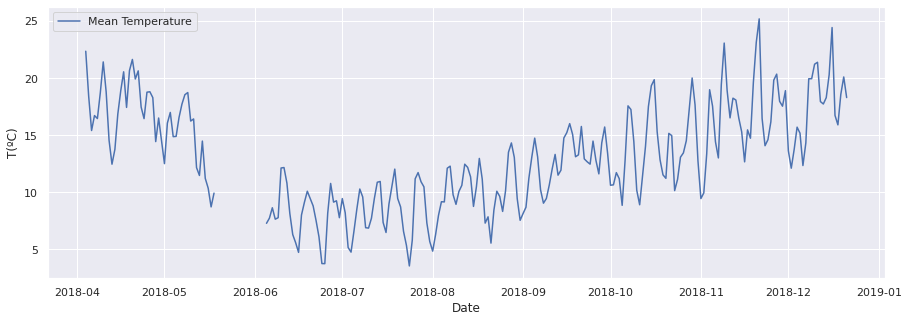

In [86]:
plt.figure(figsize = (15,5))
plt.plot(datos_diario_mean.index,datos_diario_mean['TA4'], label = 'Mean Temperature')
plt.xlabel('Date')
plt.ylabel('T(ºC)')
# plt.xlim(datetime.date(1990,1,1), datetime.date(2018,1,1))
# plt.ylim(-10,40)
plt.legend()
plt.show()

In [87]:
eddy_diario_mean = filtered_eddy.resample('D', on = 'fecha').mean()


In [88]:
eddy_diario_mean.shape

(262, 21)

In [89]:
eddy_diario_mean.head()

,u[m/s],Ts[degC],a[g/m3],p_ref[hPa],Var[u],Var[Ts],Var[a],dir[deg],ustar[m/s],HTs[W/m2],...,z/L,z/L-virt,Flag(ustar),Flag(HTs),Flag(LvE),r_err_ustar[%],r_err_HTs[%],r_err_LvE[%],T_min,T_max
fecha,,,,,,,,,,,,,,,,,,,,,
2018-04-04,3.722964,21.777671,17.154975,1007.759038,1.118236,0.099662,0.042101,97.739837,0.407571,-6.028113,...,0.023211,0.021658,1.000000,2.055556,1.750000,4.369573,9.032302,29.639429,18.054382,25.958181
2018-04-05,3.606850,18.030715,14.328033,1011.553745,1.201341,0.152160,0.752855,157.654330,0.400421,18.533338,...,0.000409,-0.000943,1.041667,2.218750,1.750000,4.735808,11.229277,19.176682,14.231564,26.084587
2018-04-06,4.521489,14.836033,8.348129,1017.969961,1.688889,0.027848,0.777767,234.688360,0.512127,-21.103666,...,0.005126,0.004605,1.000000,3.010417,2.322917,3.693229,9.173319,48.193753,13.679529,16.021105
2018-04-07,2.256152,16.278515,13.675175,1014.816034,0.494177,0.173775,1.048140,203.434726,0.246359,29.425476,...,0.085759,0.080141,1.520833,2.562500,2.677083,6.672142,15.609352,23.900175,11.646888,19.396734
2018-04-08,1.791217,16.359264,18.508344,1016.908813,0.331136,0.109369,1.753596,76.277819,0.182003,26.715202,...,0.472188,0.381022,1.489583,3.354167,5.250000,6.486548,18.135452,28.983690,9.300929,22.535881


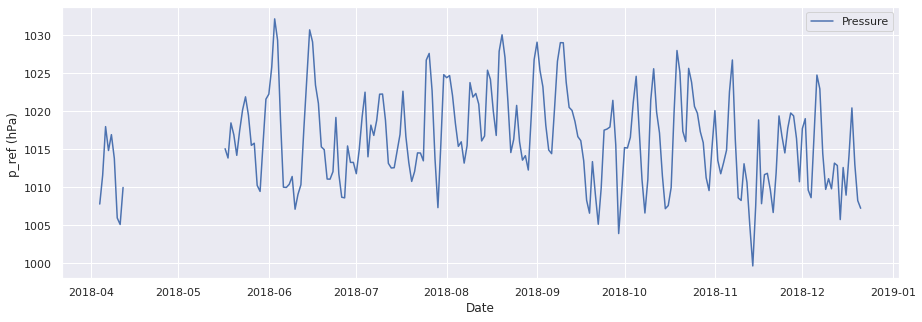

In [90]:
plt.figure(figsize = (15,5))
plt.plot(eddy_diario_mean.index,eddy_diario_mean['p_ref[hPa]     '], label = 'Pressure')
plt.xlabel('Date')
plt.ylabel('p_ref (hPa) ')
# plt.xlim(datetime.date(1990,1,1), datetime.date(2018,1,1))
# plt.ylim(-10,40)
plt.legend()
plt.show()

In [91]:
filtered_datos.columns

Index(['index', 'fecha', 'Dia juliano', 'U', 'TA1', 'HR1', 'TA3', 'HR3', 'TA4',
       'HR4', 'RG', 'e0', 'ea', 'Ra', 'Rnc', 'RS0', 'Tmin', 'Tmax', 'Rnl'],
      dtype='object')

In [92]:
col_datos_sel = ['ea','Rnc','Rnl']
meteo_diario_sel = datos_diario_mean[col_datos_sel]

In [93]:
col_eddy_sel = ['u[m/s]         ','p_ref[hPa]     ','Ts[degC]       ']
eddy_dario_sel = eddy_diario_mean[col_eddy_sel]

In [94]:
eddy.columns

Index(['u[m/s]         ', 'Ts[degC]       ', 'a[g/m3]        ',
       'p_ref[hPa]     ', 'Var[u]         ', 'Var[Ts]        ',
       'Var[a]         ', 'dir[deg]       ', 'ustar[m/s]     ',
       'HTs[W/m2]      ', 'LvE[W/m2]      ', 'z/L            ',
       'z/L-virt       ', 'Flag(ustar)    ', 'Flag(HTs)      ',
       'Flag(LvE)      ', ' r_err_ustar[%]', '   r_err_HTs[%]',
       '   r_err_LvE[%]', 'fecha', 'Dia juliano', 'T_min', 'T_max'],
      dtype='object')

In [95]:
meteo_diario_sel['Year'] = meteo_diario_sel.index.year

<ipython-input-95-e553195588c7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meteo_diario_sel['Year'] = meteo_diario_sel.index.year


In [96]:
meteo_diario_sel['t'] = datos_diario_mean['Dia juliano']

<ipython-input-96-fecdd11ac98f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meteo_diario_sel['t'] = datos_diario_mean['Dia juliano']


In [97]:
meteo_diario_sel.head()

,ea,Rnc,Rnl,Year,t
fecha,,,,,
2018-04-04,1.659073,107.965015,875548.005457,2018,94.0
2018-04-05,1.450131,125.847308,991698.184254,2018,95.0
2018-04-06,1.042381,39.671699,156676.177359,2018,96.0
2018-04-07,1.501716,113.493524,874797.412475,2018,97.0
2018-04-08,1.524640,95.989676,409690.470248,2018,98.0


In [98]:
datos_final = pd.concat([eddy_dario_sel,meteo_diario_sel],axis=1)

In [99]:
datos_final.head()

,u[m/s],p_ref[hPa],Ts[degC],ea,Rnc,Rnl,Year,t
fecha,,,,,,,,
2018-04-04,3.722964,1007.759038,21.777671,1.659073,107.965015,875548.005457,2018,94.0
2018-04-05,3.606850,1011.553745,18.030715,1.450131,125.847308,991698.184254,2018,95.0
2018-04-06,4.521489,1017.969961,14.836033,1.042381,39.671699,156676.177359,2018,96.0
2018-04-07,2.256152,1014.816034,16.278515,1.501716,113.493524,874797.412475,2018,97.0
2018-04-08,1.791217,1016.908813,16.359264,1.524640,95.989676,409690.470248,2018,98.0


In [100]:
eddy_diario_mean.to_csv('eddy_diario_mean.csv')

In [102]:
eddy_diario_mean.columns

Index(['u[m/s]         ', 'Ts[degC]       ', 'a[g/m3]        ',
       'p_ref[hPa]     ', 'Var[u]         ', 'Var[Ts]        ',
       'Var[a]         ', 'dir[deg]       ', 'ustar[m/s]     ',
       'HTs[W/m2]      ', 'LvE[W/m2]      ', 'z/L            ',
       'z/L-virt       ', 'Flag(ustar)    ', 'Flag(HTs)      ',
       'Flag(LvE)      ', ' r_err_ustar[%]', '   r_err_HTs[%]',
       '   r_err_LvE[%]', 'T_min', 'T_max'],
      dtype='object')

In [270]:
datos_diario_mean.to_csv('datos_diario_mean_merge.csv')

In [271]:
merge.to_csv('datos_horario_mean_merge.csv')

In [103]:
datos_diario_mean.columns

Index(['index', 'Dia juliano', 'U', 'TA1', 'HR1', 'TA3', 'HR3', 'TA4', 'HR4',
       'RG', 'e0', 'ea', 'Ra', 'Rnc', 'RS0', 'Tmin', 'Tmax', 'Rnl'],
      dtype='object')